In [1]:
import numpy as np
import sys
import time
import random
from tqdm.notebook import tqdm, trange
import matplotlib.pyplot as plt

sys.path.append('/home/kaliayev/Documents/ENSAE/elements_logiciels/word2vec_eltdm')

%load_ext autoreload
%autoreload 2

In [2]:
from word2vec_eltdm.word2vec_numpy import (
    Tokenizer, VocabCreator, DataLoader, TokenCleaner, Preprocessor,
    Subsampler, SimpleWord2Vec, Optimizer, CrossEntropy, train, validate
)

## Get data and create vocab

In [3]:
datapath = "../data/text8.txt"

RATIO = 0.2
tokenizer = Tokenizer(datapath)
token_cleaner = TokenCleaner(freq_threshold=5)
vocab_creator = VocabCreator()
text8_dataset = Preprocessor(tokenizer, token_cleaner, vocab_creator, RATIO).preprocess()

In [4]:
print("Size of our vocabulary:", len(text8_dataset.tokens_to_id))

Size of our vocabulary: 25611


In [5]:
print("Number of tokens in our train dataset:", len(text8_dataset.train_tokens))

Number of tokens in our train dataset: 1623905


In [6]:
print("Number of tokens in our val dataset:", len(text8_dataset.val_tokens))

Number of tokens in our val dataset: 202988


In [7]:
print("Number of tokens in our test dataset:", len(text8_dataset.test_tokens))

Number of tokens in our test dataset: 202989


## Subsampling of frequent words, as in Mikolov 2013.

In [8]:
subsampler = Subsampler(text8_dataset.train_tokens)
text8_dataset.train_tokens, text8_dataset.frequencies = subsampler.subsample()

In [9]:
print("Size of our vocabulary after subsampling of frequent words, for train:", len(text8_dataset.tokens_to_id))

Size of our vocabulary after subsampling of frequent words, for train: 25611


In [10]:
print("Number of tokens in train dataset:", len(text8_dataset.train_tokens))

Number of tokens in train dataset: 517242


## DataLoader

In [11]:
window = 5
batch_size = 256
train_dataloader = DataLoader(text8_dataset, text8_dataset.train_tokens, window, batch_size)
val_dataloader = DataLoader(text8_dataset, text8_dataset.val_tokens, window, batch_size)
test_dataloader = DataLoader(text8_dataset, text8_dataset.test_tokens, window, batch_size)

## Model

In [12]:
# defining the parameters
len_vocab = len(text8_dataset.tokens_to_id)
hidden_size = 500
embedding_size = 300
learning_rate = 1e-3

# instantiate the model
model = SimpleWord2Vec(
    len_vocab,
    hidden_size,
    embedding_size
)
model.initialize_weights()
#model.initialize_embeddings()

# using the loss that we defined
criterion = CrossEntropy() 
optimizer = Optimizer(model,learning_rate)

## Training

In [13]:
# train for some number of epochs
epochs = 5
train_loss_history = []
val_loss_history = []
tbar = trange(epochs)
for epoch in tbar:
    print(f"###################### EPOCH {epoch} ###########################")
    train_loss, val_loss = train(model, train_dataloader, val_dataloader, criterion, optimizer)
    print("Training loss:", train_loss)
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    
    #if epoch % 2 == 0:
    #    validation_loss = validate(model, val_dataloader, criterion)
    #    print("Validation loss:", validation_loss)
    #    val_loss_history.append(validation_loss)

  0%|          | 0/5 [00:00<?, ?it/s]

###################### EPOCH 0 ###########################


  0%|          | 0/2020 [00:00<?, ?it/s]

Current Training Loss 6.86938


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.869500996474468
Current Training Loss 6.86939


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.869495715694132
Training loss: 6.8694539619755375
###################### EPOCH 1 ###########################


  0%|          | 0/2020 [00:00<?, ?it/s]

Current Training Loss 6.86935


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.869493257748398
Current Training Loss 6.86941


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.86948460060809
Training loss: 6.869449459170793
###################### EPOCH 2 ###########################


  0%|          | 0/2020 [00:00<?, ?it/s]

Current Training Loss 6.86935


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.869484358249013
Current Training Loss 6.86936


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.869475684794322
Training loss: 6.8694458060973815
###################### EPOCH 3 ###########################


  0%|          | 0/2020 [00:00<?, ?it/s]

Current Training Loss 6.86935


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.869475112155543
Current Training Loss 6.86932


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.869468532717571
Training loss: 6.869442039304241
###################### EPOCH 4 ###########################


  0%|          | 0/2020 [00:00<?, ?it/s]

Current Training Loss 6.86933


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.869466690721012
Current Training Loss 6.86939


  0%|          | 0/792 [00:00<?, ?it/s]

Validation Loss:  6.869458702525667
Training loss: 6.869439472140738


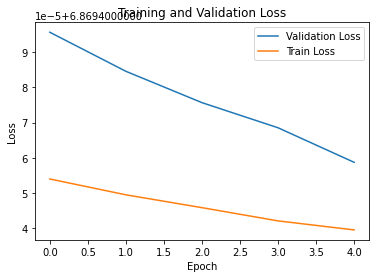

In [14]:
plt.plot(val_loss_history, label = "Validation Loss")
plt.plot(train_loss_history, label = "Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend() 
plt.title('Training and Validation Loss')
plt.show() 

In [15]:
print(model.best_W1)

[[-0.0114704   0.00781689 -0.07592398 ... -0.06584696 -0.01126968
  -0.03894035]
 [-0.04459164 -0.00029665 -0.06110165 ...  0.00161734  0.0517953
   0.03251175]
 [ 0.01919322  0.07551723 -0.02297194 ...  0.06101599  0.02081512
   0.05297369]
 ...
 [ 0.07640455 -0.08440605  0.04377483 ...  0.06914157  0.08793141
   0.07489028]
 [ 0.05681877 -0.00815245 -0.06372532 ... -0.0342809  -0.0760821
   0.06272569]
 [ 0.04764095  0.07825114  0.03601919 ... -0.07157029  0.02912176
   0.08239927]]


In [16]:
print(model.best_W2)

[[ 0.01728752  0.06498035  0.03054626 ... -0.07648543  0.0535056
   0.02259568]
 [ 0.08100971  0.08421894  0.04308239 ... -0.10965304 -0.00387338
   0.04331428]
 [-0.06079111  0.0508666  -0.06100289 ...  0.01379212  0.00782755
  -0.05316632]
 ...
 [ 0.03948089 -0.08665571  0.01979475 ... -0.06374977 -0.05353155
   0.10724318]
 [ 0.01584454 -0.02193368  0.01995545 ... -0.03979566  0.00870762
   0.03861215]
 [ 0.09548114 -0.05916092  0.04088983 ... -0.01783159 -0.04229519
  -0.0209925 ]]


## Results on test set